In [60]:
import pandas as pd

df = pd.read_csv("people.csv")


In [61]:
print(df.isnull().sum())

name             0
city             2
gender           1
age              3
income           2
credit_score     0
loan_approved    0
dtype: int64


In [62]:
# Drop rows with ANY missing value
# df_drop_rows = df.dropna()

# Drop columns with missing values
# df_drop_cols = df.dropna(axis=1)

In [63]:
df.fillna({
    "city": "Unknown",
    "age": int(df["age"].mean()),
    "gender": df["gender"].mode()[0],
    "income": df['income'].mean()
}, inplace=True)

print(df)


       name       city  gender   age        income  credit_score  \
0     Alice      Delhi  Female  25.0  50000.000000           720   
1       Bob     Mumbai    Male  30.0  60000.000000           680   
2   Charlie    Unknown    Male  28.0  55000.000000           650   
3     David    Kolkata    Male  35.0  63644.444444           700   
4       Eva      Delhi  Female  29.0  65000.000000           750   
5     Frank    Chennai  Female  40.0  70000.000000           710   
6     Grace  Bangalore  Female  32.0  72000.000000           760   
7      Hank     Mumbai    Male  31.0  58000.000000           640   
8       Ivy    Kolkata  Female  27.0  52000.000000           690   
9      Jack      Delhi    Male  31.0  61000.000000           730   
10      Kim  Bangalore  Female  26.0  50000.000000           670   
11      Leo    Chennai    Male  33.0  68000.000000           720   
12     Mona      Delhi  Female  28.0  63000.000000           740   
13     Nina    Unknown  Female  34.0  69000.0000

In [64]:
from sklearn.preprocessing import LabelEncoder

df_label = df.copy()

le = LabelEncoder()

df_label['gender_encoded'] = le.fit_transform(df['gender'])

print("Label Encoded Data (Gender)")
print(df_label[['name', 'gender', 'gender_encoded']].head())

df_encoded = pd.get_dummies(df_label, columns=['city'])
print("One-Hot Encoded Data (City)")
print(df_encoded.head())




Label Encoded Data (Gender)
      name  gender  gender_encoded
0    Alice  Female               0
1      Bob    Male               1
2  Charlie    Male               1
3    David    Male               1
4      Eva  Female               0
One-Hot Encoded Data (City)
      name  gender   age        income  credit_score  loan_approved  \
0    Alice  Female  25.0  50000.000000           720              1   
1      Bob    Male  30.0  60000.000000           680              0   
2  Charlie    Male  28.0  55000.000000           650              0   
3    David    Male  35.0  63644.444444           700              1   
4      Eva  Female  29.0  65000.000000           750              1   

   gender_encoded  city_Bangalore  city_Chennai  city_Delhi  city_Kolkata  \
0               0           False         False        True         False   
1               1           False         False       False         False   
2               1           False         False       False         False   

In [65]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_scaled_ss = df.copy()
scaler = StandardScaler()
# It makes the distribution mean = 0, std = 1.

df_scaled_ss[['age', 'income']] = scaler.fit_transform(df[['age', 'income']])
print("StandardScaler:")
print(df_scaled_ss.head())


df_scaled_mm = df.copy()
scaler = MinMaxScaler()
# scales values to [0, 1]

df_scaled_mm[['age', 'income']] = scaler.fit_transform(df[['age', 'income']])
print("MinMaxScaler:")
print(df_scaled_mm.head())


StandardScaler:
      name     city  gender       age    income  credit_score  loan_approved
0    Alice    Delhi  Female -1.600316 -1.800772           720              1
1      Bob   Mumbai    Male -0.280757 -0.480988           680              0
2  Charlie  Unknown    Male -0.808581 -1.140880           650              0
3    David  Kolkata    Male  1.038801  0.000000           700              1
4      Eva    Delhi  Female -0.544669  0.178904           750              1
MinMaxScaler:
      name     city  gender     age    income  credit_score  loan_approved
0    Alice    Delhi  Female  0.0625  0.062500           720              1
1      Bob   Mumbai    Male  0.3750  0.375000           680              0
2  Charlie  Unknown    Male  0.2500  0.218750           650              0
3    David  Kolkata    Male  0.6875  0.488889           700              1
4      Eva    Delhi  Female  0.3125  0.531250           750              1


In [66]:
from sklearn.model_selection import train_test_split

df_split = df.copy()
X = df_split[['age']]
y = df_split[['income']]

# 80 - 20 Spliting for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data")
print(X_train.head())
# print("Testing Output")
# print(y_train.head())
print("Test Data")
print(X_test.head())
# print("Test Output")
# print(y_test.head())



Training Data
     age
8   27.0
3   35.0
6   32.0
40  32.0
33  36.0
Test Data
     age
27  31.0
39  28.0
26  28.0
43  35.0
24  31.0


predicted_income :  [68791.52478244] for age 34


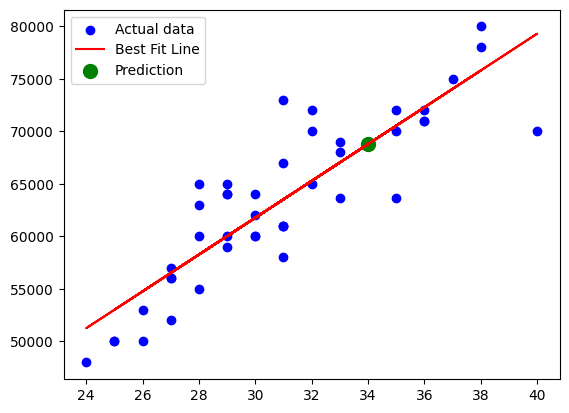

In [89]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df_lr = df.copy()

X = df_lr[['age']]
y = df_lr['income']

plt.scatter(X, y, color = "blue", label = "Actual data")

model = LinearRegression()
model.fit(X, y)

predict_age = pd.DataFrame([[34]], columns=X.columns)
predicted_income = model.predict(predict_age)

print("predicted_income : ", predicted_income, "for age 34")

plt.plot(X, model.predict(X), color="red", label="Best Fit Line")

plt.scatter(predict_age, predicted_income, color="green", label="Prediction", s = 100)


plt.legend()
plt.show()


predicted_loan: [1] for credit_score: 730


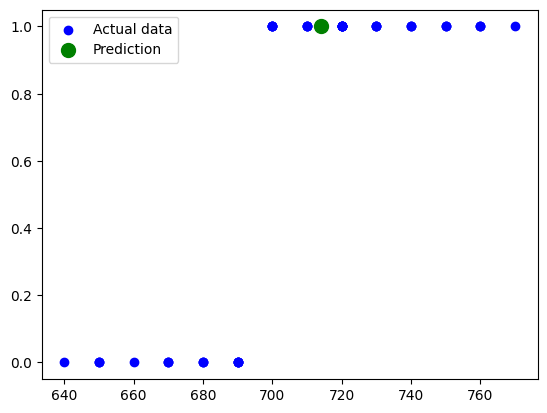

In [92]:
from sklearn.linear_model import LogisticRegression
import numpy as np

df_lr = df.copy()

X = df_lr[['credit_score']]
y = df_lr['loan_approved']

model = LogisticRegression()

model.fit(X,y)

plt.scatter(X, y, color = "blue", label = "Actual data")

predict_credit = pd.DataFrame([[714]], columns=X.columns)
predicted_loan = model.predict(predict_credit)
print("predicted_loan:", predicted_loan, "for credit_score: 730")

plt.scatter(predict_credit, predicted_loan, color="green", label="Prediction", s = 100)

plt.legend()
plt.show()



    company_abc pharma  company_facebook  company_google  \
0                False             False            True   
1                False             False            True   
2                False             False            True   
3                False             False            True   
4                False             False            True   
5                False             False            True   
6                 True             False           False   
7                 True             False           False   
8                 True             False           False   
9                 True             False           False   
10               False              True           False   
11               False              True           False   
12               False              True           False   
13               False              True           False   
14               False              True           False   
15               False              True

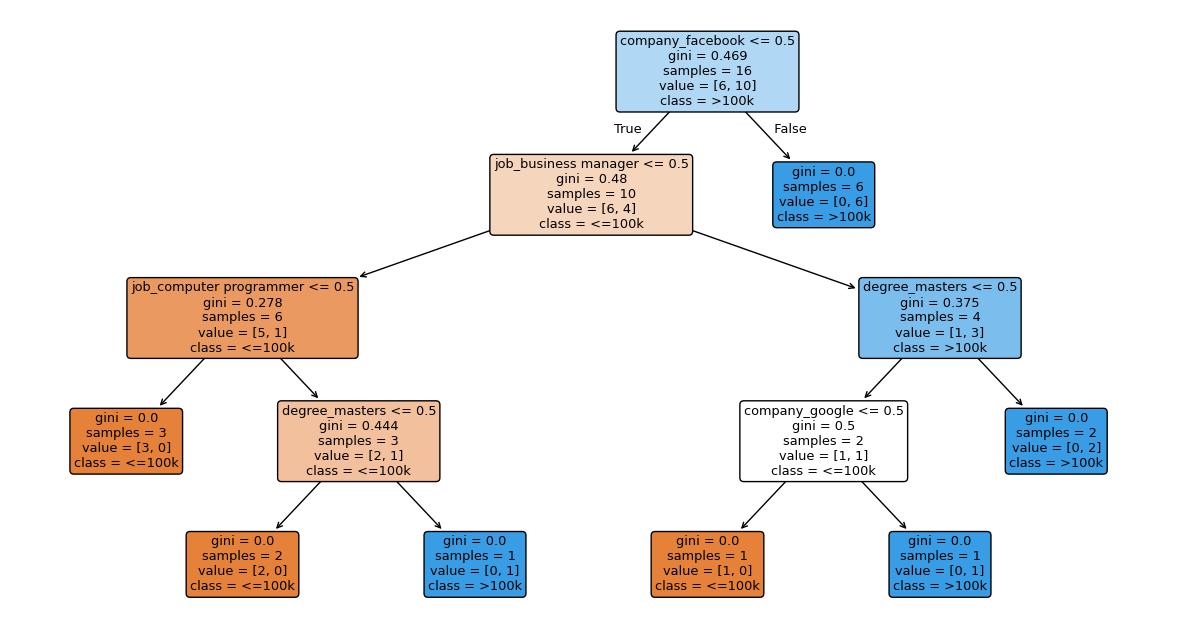

In [ ]:
df_sal = pd.read_csv("salaries.csv")

X = df_sal.drop("salary_more_then_100k", axis=1)
y = df_sal["salary_more_then_100k"]

# One-hot encode categorical columns
X = pd.get_dummies(X)

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

model = DecisionTreeClassifier()
model.fit(X, y)

plt.figure(figsize=(15,8))
plot_tree(model, feature_names=X.columns, class_names=["<=100k", ">100k"], 
          filled=True, rounded=True)
plt.show()


In [121]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

X = df_sal.drop("salary_more_then_100k", axis=1)
y = df_sal["salary_more_then_100k"]

le = LabelEncoder()
X['company_n'] = le.fit_transform(X["company"]) 
X['job_n'] = le.fit_transform(X["job"]) 
X['degree_n'] = le.fit_transform(X["degree"])

X = X.drop(['company', "job", "degree"], axis='columns')

print(X.head())

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X,y)

score= model.score(X,y)
prediction = model.predict([[2,2,0]])

print("Prediction:", prediction)
print("Score:", score)



   company_n  job_n  degree_n
0          2      2         0
1          2      2         1
2          2      0         0
3          2      0         1
4          2      1         0
Prediction: [0]
Score: 0.875


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

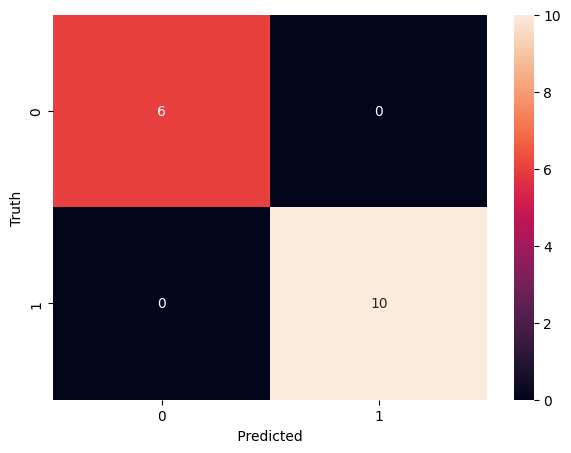

In [124]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y,y)  #first is actual values, second is predicted values

import seaborn as sn
plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True)
plt.xlabel( ' Predicted ' )
plt.ylabel( 'Truth' )